## **Discount model: Complete pipeline**

In [ ]:
import time
import pandas as pd
import numpy as np
import Utils
from DataLoader import *
from FeatureCreator import *
from Model import *

In [ ]:
config = Utils.read_json('../config.json')
Utils.print_json(config)

In [ ]:
# DATA LOADING
dataloader = DataLoader(config)
dataset = dataloader.get_dataset()

In [ ]:
dataset

In [ ]:
# FEATURE CREATION
feature_creator = FeatureCreator(dataset, config)
model_data = feature_creator.get_model_data()

In [6]:
model_data

,week,shopper,product,price,discount,purchased,substitue_discount,cluster_discount,cluster_0,cluster_1,cluster_2,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
0,86,0,0,688.0,0.0,0.0,0.0,0.1,0,1,0,104.0,0.0,0.000000,0.0,0.000000
1,86,0,1,560.0,0.0,0.0,0.0,0.1,0,1,0,104.0,0.0,0.000000,0.0,0.000000
2,86,0,2,773.0,0.0,0.0,0.0,0.1,0,1,0,104.0,0.0,0.000000,0.0,0.000000
3,86,0,3,722.0,0.0,0.0,0.0,0.1,0,1,0,104.0,0.0,0.000000,0.0,0.000000
4,86,0,4,620.0,0.0,0.0,0.0,0.1,0,1,0,16.0,0.0,0.000000,0.0,0.093023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,90,1999,245,NaN,0.0,0.0,0.0,0.0,0,0,1,1.0,1.0,0.333333,0.2,0.133333
2499996,90,1999,246,NaN,0.0,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000
2499997,90,1999,247,NaN,0.0,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000
2499998,90,1999,248,NaN,0.0,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000


In [8]:
# MODELING - Train-Test-Split
model = Model(model_data)
X_train, y_train, X_test, y_test = model.train_test_split(config)

/Users/sascha/Desktop/mlim-g2/env/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/sascha/Desktop/mlim-g2/env/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [9]:
X_test

,price,discount,substitue_discount,cluster_discount,cluster_0,cluster_1,cluster_2,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
2000000,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,-0.595444
2000001,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,0.615436
2000002,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,-0.713309
2000003,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,-1.397781
2000004,NaN,0.0,0.0,0.0,0,1,0,20.0,0.0,0.000000,0.0,0.088889,0.074996,-0.163894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,NaN,0.0,0.0,0.0,0,0,1,1.0,1.0,0.333333,0.2,0.133333,0.248261,-0.818372
2499996,NaN,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000,0.248261,-0.305680
2499997,NaN,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000,0.248261,-1.574931
2499998,NaN,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000,0.248261,0.792432


In [10]:
X_test

,price,discount,substitue_discount,cluster_discount,cluster_0,cluster_1,cluster_2,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
2000000,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,-0.595444
2000001,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,0.615436
2000002,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,-0.713309
2000003,NaN,0.0,0.0,0.0,0,1,0,104.0,0.0,0.000000,0.0,0.000000,0.074996,-1.397781
2000004,NaN,0.0,0.0,0.0,0,1,0,20.0,0.0,0.000000,0.0,0.088889,0.074996,-0.163894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,NaN,0.0,0.0,0.0,0,0,1,1.0,1.0,0.333333,0.2,0.133333,0.248261,-0.818372
2499996,NaN,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000,0.248261,-0.305680
2499997,NaN,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000,0.248261,-1.574931
2499998,NaN,0.0,0.0,0.0,0,0,1,104.0,0.0,0.000000,0.0,0.000000,0.248261,0.792432


In [13]:
# FITTING THE MODEL
model.fit(X_train, y_train)
y_hat = model.predict(X_train)
score = model.get_score(y_train, y_hat)
score

0.07600950467011205

In [27]:
#### Cut - Refactoring ends here

In [19]:
model_config = {
    'test_week': 90,
    'train_window': 4,
    'n_coupons': 5,
    'discounts': [0.15, 0.2, 0.25, 0.3]
}

top_coupons = discount_model.pipeline(**model_config)
print(f"[discount pipeline] done (elapsed time: {discount_model._format_time(time.time() - start)})")
top_coupons

[discount] train-log-loss: 0.076118548022094
[discount pipeline] done (elapsed time: 50:39)


,shopper,week,coupon,product,discount
1171,0,90,0,171,0.15
1076,0,90,1,76,0.15
1157,0,90,2,157,0.15
1067,0,90,3,67,0.15
1004,0,90,4,4,0.30
...,...,...,...,...,...
2499825,1999,90,0,75,0.15
2499963,1999,90,1,213,0.15
2499791,1999,90,2,41,0.15
2499803,1999,90,3,53,0.25


<AxesSubplot:>

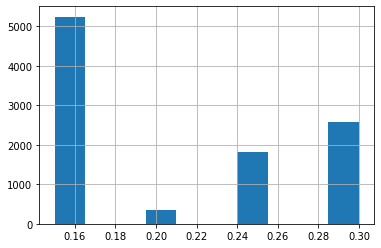

In [20]:
# discount distributions
top_coupons['discount'].hist()

In [21]:
discount_model.dump(DATA_PATH, which='data')

<br>
<br>
<br>

### **Iteratively creating the final output**

In [7]:
discount_model = Discount.No_Cross_Effects()
discount_model.load(files)

# reduce file sizes
for name, df in discount_model.data.items():
    discount_model.data[name] = discount_model.reduce_data_size(discount_model.data[name])

In [8]:
discount_model.get_merged()

,week,shopper,product,price,discount
0,0,0,71,629.0,NaN
1,0,0,91,605.0,NaN
2,0,0,116,715.0,NaN
3,0,0,123,483.0,NaN
4,0,0,157,592.0,NaN
...,...,...,...,...,...
111133550,89,99998,167,NaN,20.0
111133551,89,99999,62,NaN,40.0
111133552,89,99999,37,NaN,40.0
111133553,89,99999,155,NaN,25.0


In [9]:
discount_model.clean()

,week,shopper,product,price,discount,purchased
0,0,0,71,629.0,0.00,1
1,0,0,91,605.0,0.00,1
2,0,0,116,715.0,0.00,1
3,0,0,123,483.0,0.00,1
4,0,0,157,592.0,0.00,1
...,...,...,...,...,...,...
110673244,89,1998,101,NaN,0.25,0
110673245,89,1999,207,NaN,0.25,0
110673246,89,1999,246,NaN,0.30,0
110673247,89,1999,51,NaN,0.15,0


In [12]:
discount_model.prepare(week=(86,90), shopper=(0,9), product=(1,19))

/Applications/Conda/anaconda3/envs/mlim/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[prepare] itertools... (elapsed time: 00:00)
[prepare] merge... (elapsed time: 00:00)
[prepare] cleaning... (elapsed time: 00:01)


  0%|          | 0/950 [00:00<?, ?it/s]

[prepare] feature creation... (elapsed time: 00:04)


100%|██████████| 950/950 [00:00<00:00, 2055.25it/s]


[prepare] done (elapsed time: 00:06)


,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
0,0,86,1,560.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
1,0,86,2,773.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
2,0,86,3,722.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
3,0,86,4,620.0,0.0,0.0,16.0,0.0,0.0,0.0,0.093023
4,0,86,5,721.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
945,9,90,15,620.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
946,9,90,16,743.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
947,9,90,17,725.0,0.0,0.0,14.0,0.0,0.0,0.0,0.044444
948,9,90,18,665.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000


In [13]:
model_config = {
    'test_week': 90,
    'train_window': 4,
    'n_coupons': 5,
    'discounts': [0.15, 0.2, 0.25, 0.3]
}

# discount_model.compute_optimal_coupons
top_coupons = discount_model.pipeline(90, 4, [0.15, 0.2, 0.25, 0.3])
top_coupons

[discount] train-log-loss: 0.000790962989437093


,shopper,week,coupon,product,discount
89,0,90,0,14,0.15
84,0,90,1,9,0.15
82,0,90,2,7,0.15
77,0,90,3,2,0.15
87,0,90,4,12,0.15
184,1,90,0,14,0.15
179,1,90,1,9,0.15
177,1,90,2,7,0.15
172,1,90,3,2,0.15
182,1,90,4,12,0.15
